In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import curve_fit

In [17]:
poluvalni2 = pd.read_excel(r'3. ISPRAVLJAČKI SKLOPOVI.xlsx', sheet_name='2_poluvalni')
poluvalni2

,a),ID / mA,+/-,Ii / mA,+/-.1,Unnamed: 5,b),ID / mA.1,+/-.2,Ii / mA.1,+/-.3
0,ID = 3 +/- 0.5 mA,3,0.5,3.5,0.5,NaN,C = 204 μF,10,0.5,10.5,0.5
1,NaN,5,0.5,5.0,0.5,NaN,NaN,12,0.5,14.0,0.5
2,NaN,10,0.5,10.0,0.5,NaN,NaN,14,0.5,19.0,0.5
3,NaN,15,0.5,15.0,0.5,NaN,NaN,16,0.5,28.0,0.5
4,NaN,20,0.5,20.0,0.5,NaN,NaN,18,0.5,40.0,1.0


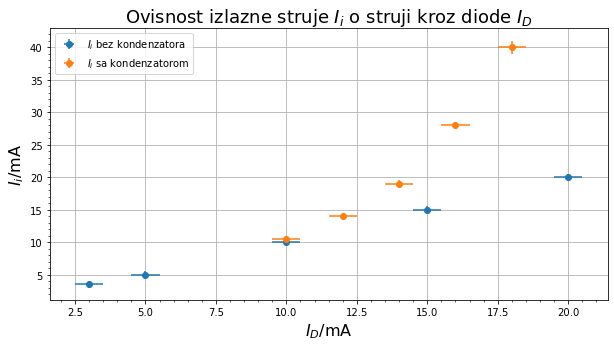

In [18]:
x = list(poluvalni2['ID / mA'])
y = list(poluvalni2['Ii / mA'])
pogreske1 = list(poluvalni2['+/-'])
pogreske2 = list(poluvalni2['+/-.1'])

x2 = list(poluvalni2['ID / mA.1'])
y2 = list(poluvalni2['Ii / mA.1'])
pogreske21 = list(poluvalni2['+/-.2'])
pogreske22 = list(poluvalni2['+/-.3'])


fig1, ax = plt.subplots(figsize=(10,5))
ax.set_title('Ovisnost izlazne struje $I_{i}$ o struji kroz diode $I_{D}$', fontsize = 18)
ax.set_xlabel('$ I_{D} \mathrm{/ mA} $', fontsize = 16)
ax.set_ylabel('$ I_{i} \mathrm{/ mA} $', fontsize = 16)
ax.errorbar(x,y, xerr=pogreske1, yerr = pogreske2, fmt='o', label = '$ I_{i} $ bez kondenzatora')
ax.errorbar(x2,y2, xerr=pogreske21, yerr = pogreske22, fmt='o', label = '$ I_{i} $ sa kondenzatorom')
ax.legend()
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid()

In [4]:
poluvalni3 = pd.read_excel(r'3. ISPRAVLJAČKI SKLOPOVI.xlsx', sheet_name='3_poluvalni')
poluvalni3

,Unnamed: 0,Ii / mA,+/-,Uw / V,+/-.1,tiz / ms,+/-.2,Uwt / V,+/-.3,T / %
0,NaN,10,0.5,0.40,0.02,17.2,0.2,0.389140,0.019976,97.209302
1,C = 442 μF,20,0.5,0.80,0.05,17.2,0.2,0.778281,0.021459,97.209302
2,NaN,30,0.5,1.25,0.05,17.0,0.2,1.153846,0.023539,91.666667
3,NaN,40,0.5,1.65,0.05,17.0,0.2,1.538462,0.026409,92.750000
4,NaN,50,0.5,2.00,0.10,16.8,0.2,1.900452,0.029547,94.761905


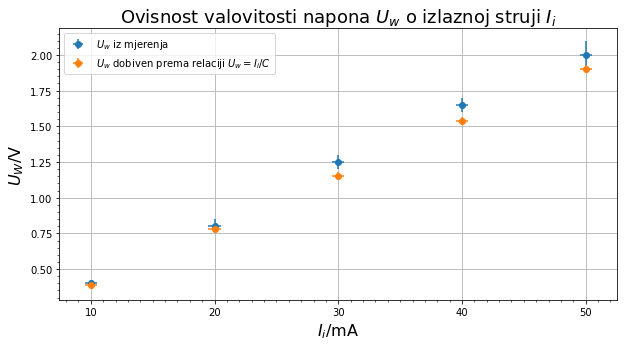

In [5]:
x = list(poluvalni3['Ii / mA'])
y = list(poluvalni3['Uw / V'])
pogreske1 = list(poluvalni3['+/-'])
pogreske2 = list(poluvalni3['+/-.1'])
y2 = list(poluvalni3['Uwt / V'])
pogreske3 = list(poluvalni3['+/-.3'])

fig2, ex = plt.subplots(figsize=(10,5))
ex.set_title('Ovisnost valovitosti napona $U_{w}$ o izlaznoj struji $I_{i}$', fontsize = 18)
ex.set_xlabel('$ I_{i} \mathrm{/ mA} $', fontsize = 16)
ex.set_ylabel('$ U_{W} \mathrm{/ V} $', fontsize = 16)
ex.errorbar(x,y, xerr=pogreske1, yerr = pogreske2, fmt='o', label = '$U_{w}$ iz mjerenja')
ex.errorbar(x,y2, fmt='o',xerr=pogreske1, yerr = pogreske3, label = '$U_{w}$ dobiven prema relaciji $U_{w} = I_{i} / C$')
ex.legend()
ex.xaxis.set_minor_locator(MultipleLocator(1))
ex.yaxis.set_minor_locator(MultipleLocator(0.05))
ex.grid()

In [6]:
poluvalni4 = pd.read_excel(r'3. ISPRAVLJAČKI SKLOPOVI.xlsx', sheet_name='4_poluvalni')
poluvalni4

,Unnamed: 0,C/μF,Uw /V,+/-,t / ms,+/-.1,Uwt /V,+/-.2,T / %
0,NaN,110,1.60,0.05,17.4,0.2,1.581818,0.018182,98.850575
1,Ii = 10 mA,204,0.90,0.05,17.2,0.2,0.843137,0.009804,93.255814
2,NaN,442,0.42,0.02,17.2,0.2,0.389140,0.004525,92.069767
3,NaN,1088,0.17,0.02,17.6,0.2,0.161765,0.001838,94.909091


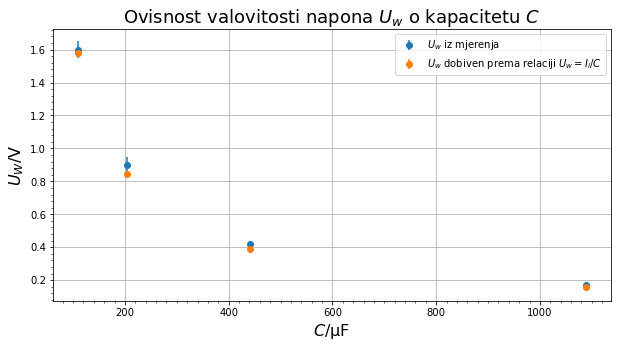

In [7]:
x = list(poluvalni4['C/μF'])
y = list(poluvalni4['Uw /V'])
pogreske2 = list(poluvalni4['+/-'])
y2 = list(poluvalni4['Uwt /V'])
pogreske3 = list(poluvalni4['+/-.2'])

fig3, ix = plt.subplots(figsize=(10,5))
ix.set_title('Ovisnost valovitosti napona $U_{w}$ o kapacitetu $C$', fontsize = 18)
ix.set_xlabel('$ C\mathrm{/ \mu F} $', fontsize = 16)
ix.set_ylabel('$ U_{W} \mathrm{/ V} $', fontsize = 16)
ix.errorbar(x,y, yerr = pogreske2, fmt='o', label = '$U_{w}$ iz mjerenja')
ix.errorbar(x,y2, yerr = pogreske3, fmt='o', label = '$U_{w}$ dobiven prema relaciji $U_{w} = I_{i} / C$')
ix.legend()
ix.xaxis.set_minor_locator(MultipleLocator(20))
ix.yaxis.set_minor_locator(MultipleLocator(0.04))
ix.grid()

In [8]:
poluvalni5 = pd.read_excel(r'3. ISPRAVLJAČKI SKLOPOVI.xlsx', sheet_name='5_poluvalni')
poluvalni5

,Unnamed: 0,Ueff / V,+/-,Ui / V,+/-.1,Ueff K2 / V,+/-.2,T / %
0,NaN,2,0.1,2.2,0.1,2.828427,0.1,77.781746
1,I = 0 mA,4,0.1,5.1,0.1,5.656854,0.1,90.156115
2,C = 442 μF,6,0.1,7.8,0.1,8.485281,0.1,91.923882
3,NaN,8,0.1,11.0,0.1,11.313708,0.1,97.227182
4,NaN,10,0.1,14.0,0.1,14.142136,0.1,98.994949


In [9]:
x = list(poluvalni5['Ueff / V'])
y = list(poluvalni5['Ui / V'])
pogreske1 = list(poluvalni5['+/-'])
pogreske2 = list(poluvalni5['+/-.1'])
y2 = list(poluvalni5['Ueff K2 / V'])
pogreske3 = list(poluvalni5['+/-.2'])

In [14]:
def funkcija(x, a, b):
    return a*x + b

ts = np.linspace(2, 10, 100)
pars1, cov1 = curve_fit(funkcija, x, y)
pars2, cov2 = curve_fit(funkcija, x, y2)
print(pars1)
print(pars2)

[ 1.475 -0.83 ]
[ 1.41421356e+00 -2.18013780e-12]


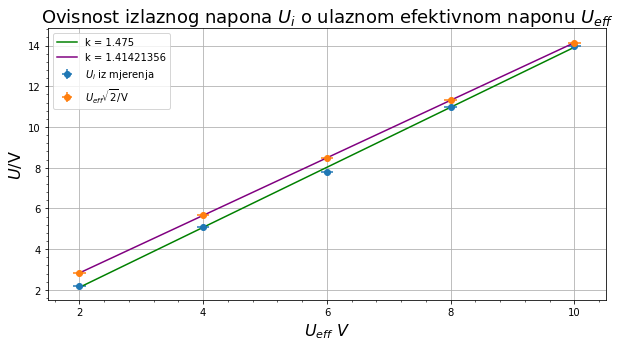

In [15]:
fig4, ux = plt.subplots(figsize=(10,5))

ux.set_title('Ovisnost izlaznog napona $U_{i}$ o ulaznom efektivnom naponu $U_{eff}$ ', fontsize = 18)
ux.set_xlabel('$ U_{eff}\ V$', fontsize = 16)
ux.set_ylabel('$ U \mathrm{/ V} $', fontsize = 16)

ux.errorbar(x,y, xerr = pogreske1, yerr = pogreske2, fmt='o', label = '$U_{i}$ iz mjerenja')
ux.errorbar(x,y2, xerr = pogreske1, yerr = pogreske3, fmt='o', label = '$U_{eff} \sqrt{2} \mathrm{/ V}$')
ux.plot(ts, funkcija(ts, *pars1), label='k = 1.475', color='green')
ux.plot(ts, funkcija(ts, *pars2), label='k = 1.41421356', color='purple')

ux.legend()
ux.xaxis.set_minor_locator(MultipleLocator(0.4))
ux.yaxis.set_minor_locator(MultipleLocator(0.4))
ux.grid()

In [16]:
fig1.savefig('prvi.jpg')
fig2.savefig('drugi.jpg')
fig3.savefig('treci.jpg')
fig4.savefig('cetvrti.jpg')